<a href="https://colab.research.google.com/github/lfarthi1/COSC522Project/blob/main/win_%26_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
data = pd.read_csv("brawlhalla_matches.csv")
data

,match_id,date,year,tournament_name,event_name,is_official,player_1_name,player_1_smash_id,player_1_region,player_1_pr,player_1_score,player_1_legends,player_2_name,player_2_smash_id,player_2_score,player_2_legends,winner,maps
0,67322836,2023-11-03,2023,Brawlhalla World Championship Expo 2023,1v1,Yes,Zivai,2580895,EU,1,1,"MORDEX, RAYMAN, WU_SHANG, MORDEX",Kyna,135748,3,"TEROS, TEROS, TEROS, TEROS",Player 2,"FortressoftheLions, Apocalypse, DemonIsland, F..."
1,67322820,2023-11-03,2023,Brawlhalla World Championship Expo 2023,1v1,Yes,Zivai,2580895,EU,1,1,"RAYMAN, RAYMAN, TEROS, RAYMAN",yüz,73254,3,", , ,",Player 2,"Apocalypse, Apocalypse, MiamiDome, Apocalypse"
2,67322818,2023-11-03,2023,Brawlhalla World Championship Expo 2023,1v1,Yes,Zivai,2580895,EU,1,3,"RAYMAN, RAYMAN, RAYMAN",Impala,168635,0,"EMBER, KAYA, EMBER",Player 1,"MiamiDome, MiamiDome, FortressoftheLions"
3,67317310,2023-11-03,2023,Brawlhalla World Championship Expo 2023,1v1,Yes,Zivai,2580895,EU,1,3,"RAYMAN, RAYMAN, RAYMAN, RAYMAN",megD,142100,1,"VAL, VAL, VAL, VAL",Player 1,"FortressoftheLions, FortressoftheLions, DemonI..."
4,67317302,2023-11-03,2023,Brawlhalla World Championship Expo 2023,1v1,Yes,Zivai,2580895,EU,1,3,Not Reported,Zennnnn,141522,2,Not Reported,Player 1,Not Reported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12526,55581728,2023-01-05,2023,Galaxy Cup: Blizzard,EU 1v1,No,ECHO | Genga199,2254292,EU,62,0,Not Reported,Shadra - Baguette senpai,119437,2,Not Reported,Player 2,Not Reported
12527,55581357,2023-01-05,2023,Galaxy Cup: Blizzard,EU 1v1,No,ECHO | Genga199,2254292,EU,62,0,Not Reported,DanHasCorona,145017,2,Not Reported,Player 2,Not Reported
12528,55581333,2023-01-05,2023,Galaxy Cup: Blizzard,EU 1v1,No,ECHO | Genga199,2254292,EU,62,2,Not Reported,N1K1D,152604,1,Not Reported,Player 1,Not Reported
12529,55581290,2023-01-05,2023,Galaxy Cup: Blizzard,EU 1v1,No,ECHO | Genga199,2254292,EU,62,0,Not Reported,Vocal,119564,-1,Not Reported,Player 1,Not Reported


# Getting Complete List Of All Legends Used

In [26]:
legends = []
for row in data.itertuples(index=True):
  p1legends = list(filter(bool, [string.strip() for string in row.player_1_legends.split(",")])) # Grab P1's legends and remove whitespace/empties
  for legend in p1legends: # Iterate through all of P1's legends
    if legend not in legends: # If legend is not already recorded in legends
        legends.append(legend) # Append legend to list

  p2legends = list(filter(bool, [string.strip() for string in row.player_2_legends.split(",")])) # Grab P2's legends and remove whitespace/empties
  for legend in p2legends: # Iterate through all of P2's legends
    if legend not in legends: # If legend is not already recorded in legends
        legends.append(legend) # Append legend to list

if "Not Reported" in legends:
  legends.remove("Not Reported") # Remove 'Not Reported' from the list of legends

for legend in legends:
  print(legend)

MORDEX
RAYMAN
WU_SHANG
TEROS
EMBER
KAYA
VAL
JHALA
VOLKOV
ASURI
JAEYUN
TEZCA
BODVAR
CASPIAN
XULL
KOJI
THEA
ORION
HATTORI
FAIT
LUCIEN
VECTOR
PETRA
BRYNN
MIRAGE
QUEEN_NAI
ULGRIM
DIANA
RAGNIR
DUSK
CASSIDY
LIN_FEI
NIX
MUNIN
JIRO
SCARLET
ZARIEL
LOKI
RED_RAPTOR
EZIO
ARTEMIS
MAGYAR
ISAIAH
SENTINEL
LORD_VRAXX
SIDRA
AZOTH
YUMIKO
THOR
CROSS
ADA
ARCADIA
KOR
ONYX
RENO
GNASH
SIR_ROLAND
MAKO
BARRAZA
THATCH


# Calculating Win/Usage Of Each Character In Every Event

In [28]:
winDict = {}
usageDict = {}

for row in data.itertuples(index=True):
  # Record winner of the match as an integer
  if "1" in row.winner:
    winner = 1
  elif "2" in row.winner:
    winner = 2

  p1legends = list(set(list(filter(bool, [string.strip() for string in row.player_1_legends.split(",")])))) # Grab P1's legends and remove whitespace/empties/duplicates
  for legend in p1legends:
    if legend in usageDict:
        usageDict[legend] += 1
    else:
        usageDict[legend] = 1
    if winner == 1:
      if legend in winDict:
        winDict[legend] += 1
      else:
        winDict[legend] = 1

  p2legends = list(set(list(filter(bool, [string.strip() for string in row.player_2_legends.split(",")])))) # Grab P2's legends and remove whitespace/empties/duplicates
  for legend in p2legends:
    if legend in usageDict:
        usageDict[legend] += 1
    else:
        usageDict[legend] = 1
    if winner == 2:
      if legend in winDict:
        winDict[legend] += 1
      else:
        winDict[legend] = 1

del winDict['Not Reported']
del usageDict['Not Reported']

# totalmatches = len(data) * 2

# for legend in winDict:
#   print(f"{legend}\t\t{winDict[legend]}\t\t{usageDict[legend]}\t\t{winDict[legend]/usageDict[legend]}\t\t{usageDict[legend]/totalmatches}")

In [30]:
legenddf = pd.DataFrame(columns=['legend', 'wins',	'uses',	'win%', 'usage%'])

for legend in winDict:
  # print(f"{legend}\t\t{winDict[legend]}\t\t{usageDict[legend]}\t\t{winDict[legend]/usageDict[legend]}\t\t{usageDict[legend]/totalmatches}")
  legenddf.loc[len(legenddf)] = [legend, winDict[legend], usageDict[legend], winDict[legend]/usageDict[legend], 0]

legenddf

,legend,wins,uses,win%,usage%
0,TEROS,185,328,0.564024,0
1,RAYMAN,61,138,0.442029,0
2,WU_SHANG,72,150,0.480000,0
3,KAYA,198,381,0.519685,0
4,MORDEX,121,305,0.396721,0
5,VAL,85,188,0.452128,0
6,JHALA,29,54,0.537037,0
7,HATTORI,68,189,0.359788,0
8,CASPIAN,52,127,0.409449,0
9,VECTOR,39,71,0.549296,0


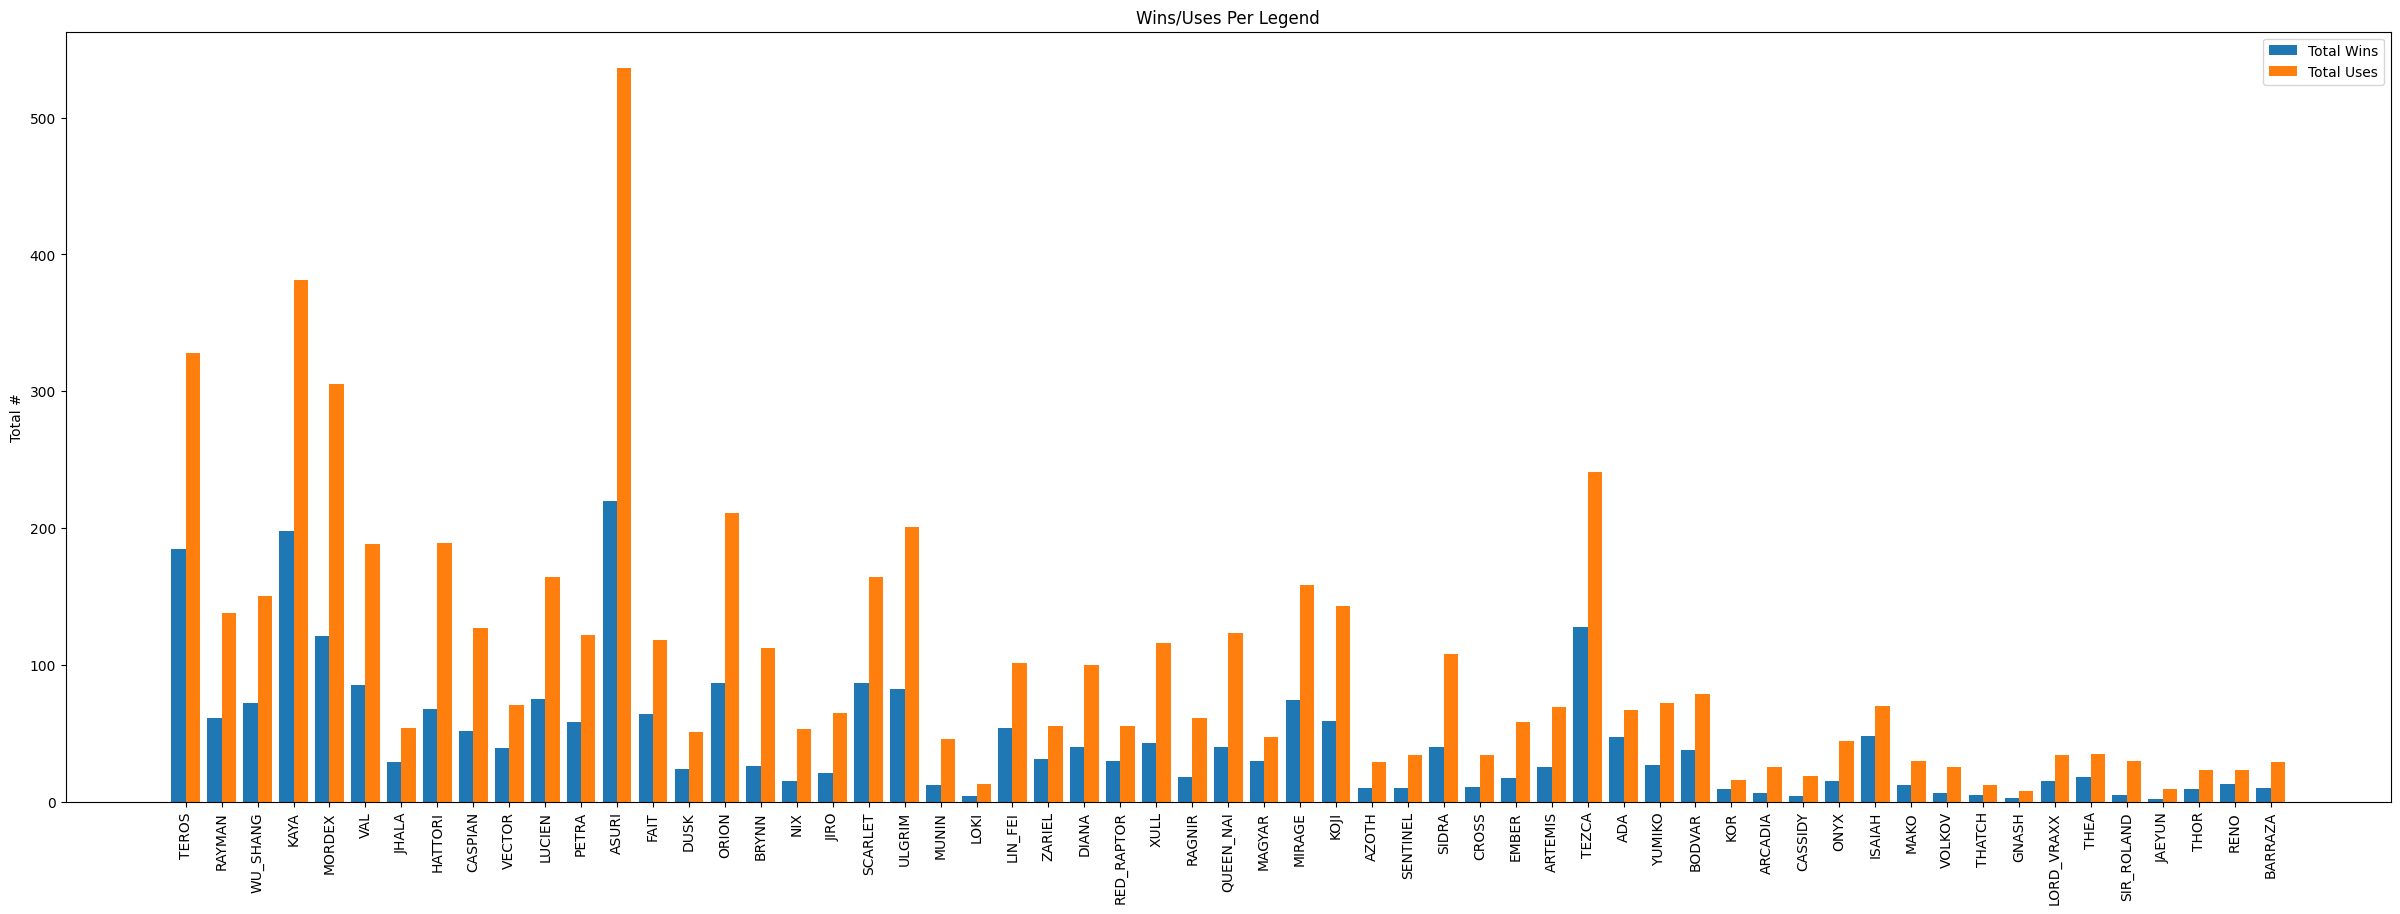

In [41]:
# Bar width and x locations
w, x = 0.4, np.arange(len(legenddf))

fig, ax = plt.subplots(figsize=(30, 10))
ax.bar(x - w/2, legenddf['wins'], width=w, label='Total Wins')
ax.bar(x + w/2, legenddf['uses'], width=w, label='Total Uses')

ax.set_xticks(x)
ax.set_xticklabels(legenddf['legend'], rotation=90)
ax.set_ylabel('Total #')
ax.set_title('Wins/Uses Per Legend')
ax.legend()

plt.show()

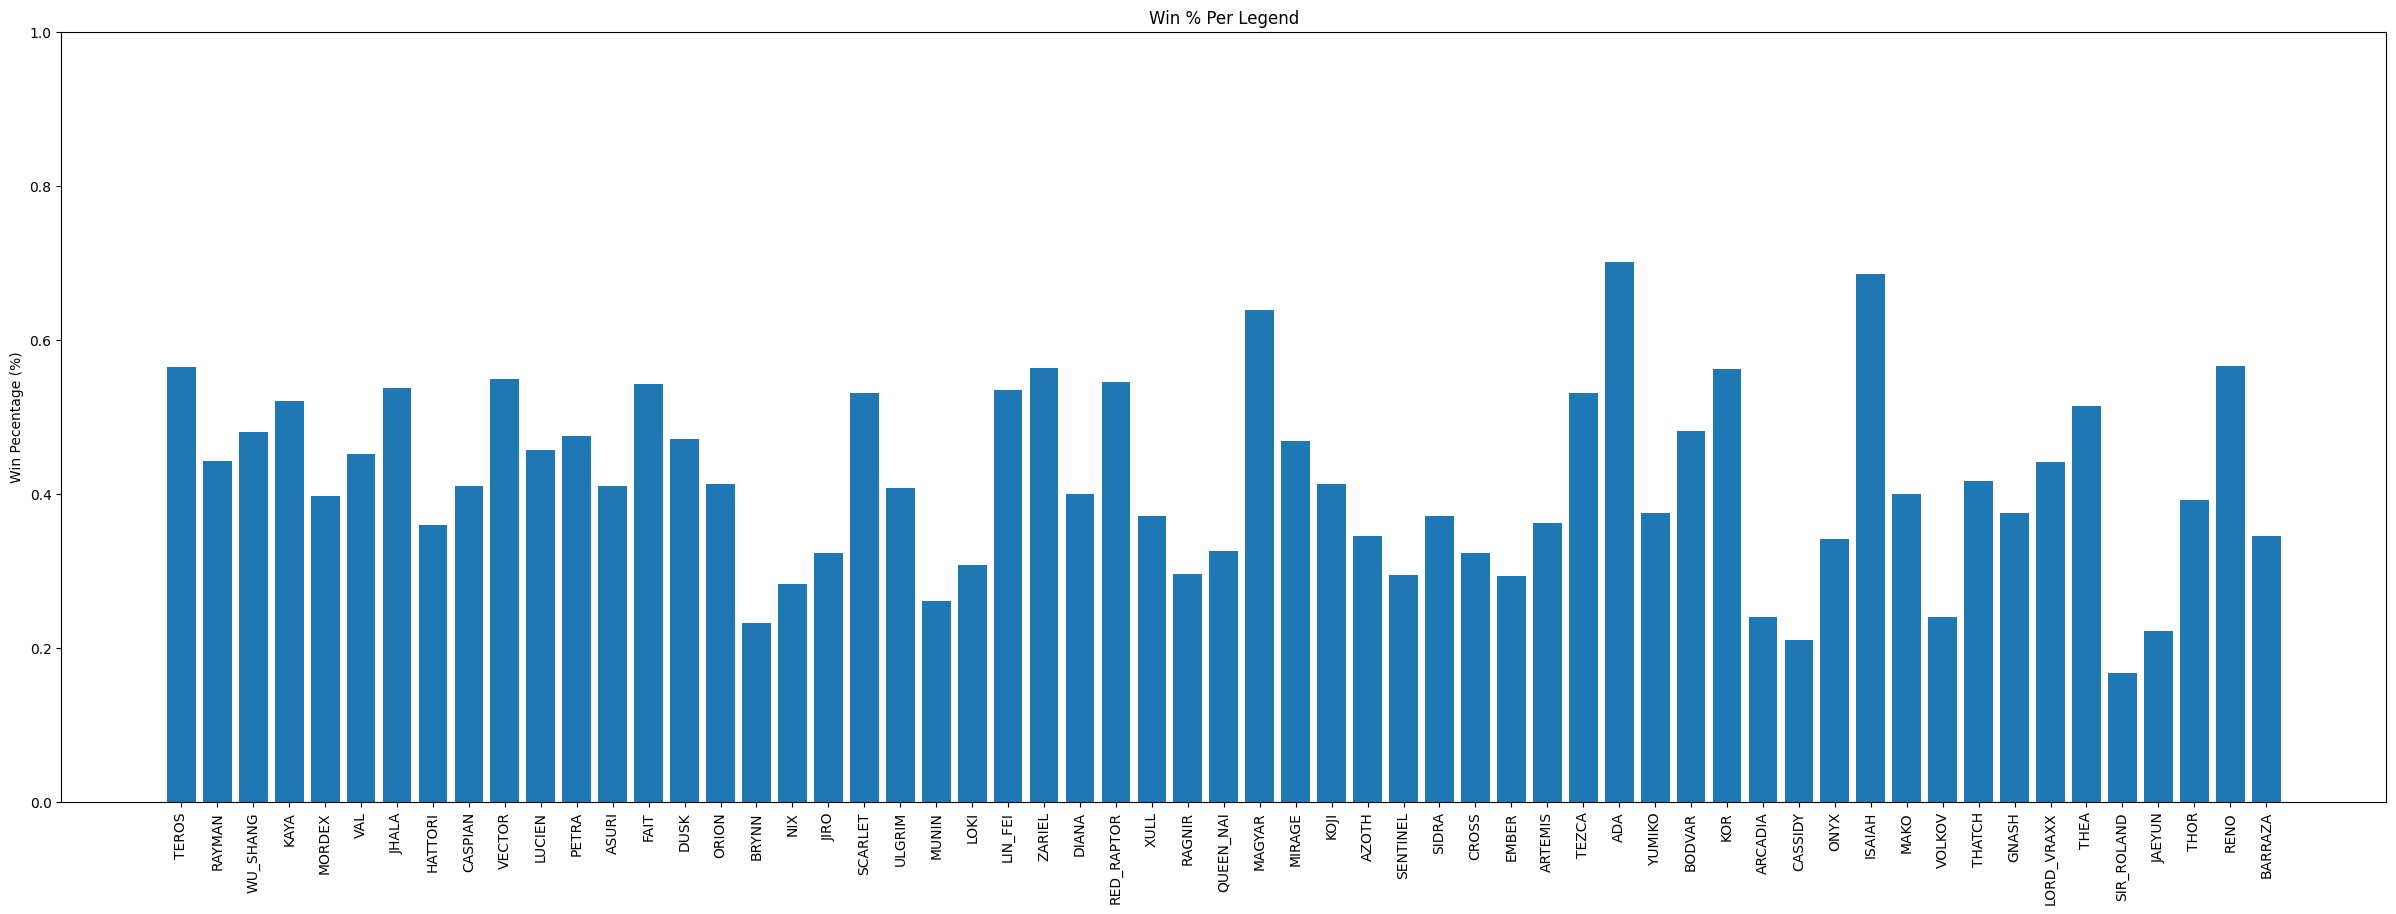

In [56]:
plt.figure(figsize=(30, 10))
plt.bar(legenddf['legend'], legenddf['win%'])
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.title('Win % Per Legend')
plt.ylabel('Win Pecentage (%)')
plt.show()

# Getting The Usage Of Legends By Tournament

In [22]:
legend = "KAYA"
tournament = "Brawlhalla World Championship Expo 2023"

tournamentWin = {}
tournamentUsage = {}

tournamentdata = data.loc[data['tournament_name'] == tournament]

for row in tournamentdata.itertuples(index=True):
  # Record winner of the match as an integer
  if "1" in row.winner:
    winner = 1
  elif "2" in row.winner:
    winner = 2

  if legend in row.player_1_legends:
    if legend in tournamentUsage:
      tournamentUsage[legend] += 1
    else:
      tournamentUsage[legend] = 1
    if winner == 1:
      if legend in tournamentWin:
        tournamentWin[legend] += 1
      else:
        tournamentWin[legend] = 1

  if legend in row.player_2_legends:
    if legend in tournamentUsage:
      tournamentUsage[legend] += 1
    else:
      tournamentUsage[legend] = 1
    if winner == 2:
      if legend in tournamentWin:
        tournamentWin[legend] += 1
      else:
        tournamentWin[legend] = 1

# del winDict['Not Reported']
# del usageDict['Not Reported']

for legend in tournamentWin:
  print(f"{legend}\t\t{tournamentWin[legend]}\t\t{tournamentUsage[legend]}\t\t{tournamentWin[legend]/tournamentUsage[legend]}")

KAYA		6		13		0.46153846153846156


In [ ]:
legend = "KAYA"

for tournament in data.tournament_name.unique():